In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_excel("Credit_card_fraud_clean_Data.xlsx")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts(normalize=True)


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [4]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
rf = RandomForestClassifier(
    n_estimators=200,max_depth=None,class_weight="balanced_subsample",random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred_rf = rf.predict(X_test)


In [10]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm_rf)
print("Recall:", recall_rf)
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
 [[56655     1]
 [   25    65]]
Recall: 0.7222222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [13]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

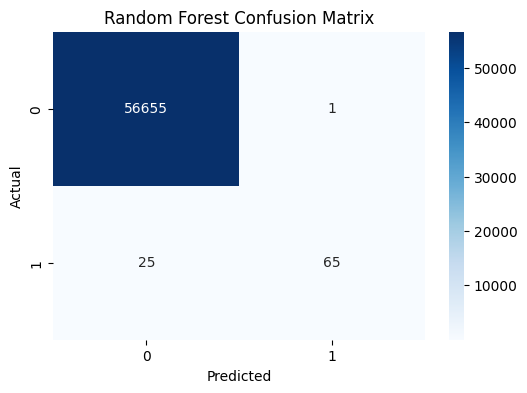

In [14]:
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")


In [15]:
xgb = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=10,   # helps with imbalance!
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [16]:
y_pred_xgb = xgb.predict(X_test)


In [17]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("Confusion Matrix (XGBoost):\n", cm_xgb)
print("Recall:", recall_xgb)
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix (XGBoost):
 [[56650     6]
 [   20    70]]
Recall: 0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.78      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

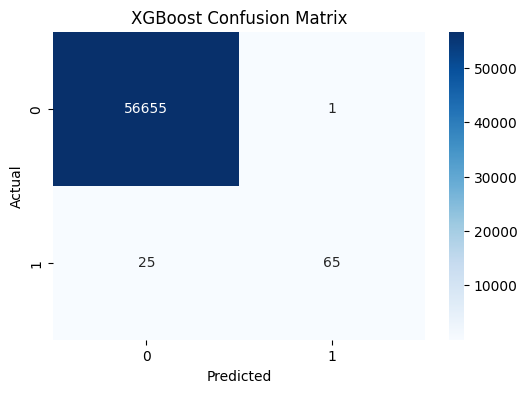

In [18]:
plot_confusion_matrix(cm_rf, "XGBoost Confusion Matrix")
